In [1]:
import sys
sys.path.append('../src/')
from datetime import datetime as dt

import loader

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rcParams['font.family'] = 'Roboto'

import warnings
warnings.filterwarnings("ignore")





Coming back to this project, 


Here’s what I would like to see next:
1. The number of both employed and unemployed startup grant recipients combined, compared on the same graph with the number of unemployed.
2. I wonder if there’s any correlation between unemployment and applications for startup grant.


In [2]:
macro_data = loader.startupGrants().load()
employment_data = loader.employmentRate().get_data()


ConnectionError: HTTPSConnectionPool(host='pxdata.stat.fi', port=443): Max retries exceeded with url: /PxWeb/api/v1/en/StatFin/tyonv/statfin_tyonv_pxt_12u6.px (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f3836255340>: Failed to resolve 'pxdata.stat.fi' ([Errno -2] Name or service not known)"))

In [9]:
data["Total start-up grant"] = data["Start-up grant for non-unemployed"] + data["Start-up grant for unemployed"]

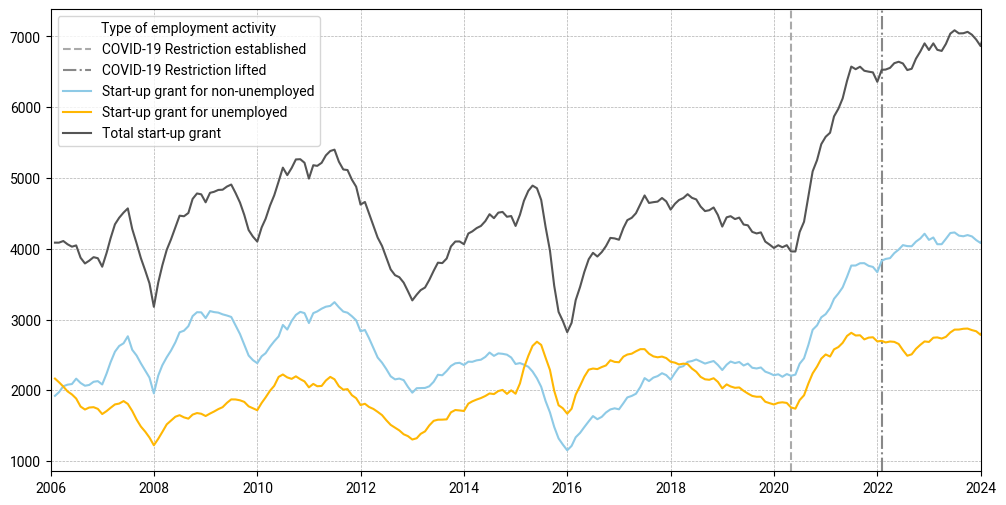

In [25]:
plt.figure(figsize=(12, 6))
plt.grid(True, which="both", ls="--", lw=0.5)

COVID = dt.strptime("2020-05-01", '%Y-%m-%d')
NORMAL = dt.strptime("2022-02-01", '%Y-%m-%d')

ax = plt.gca()


plt.xlim(
	dt.strptime("2006-01-01", '%Y-%m-%d'), 
	dt.strptime("2024-01-01", '%Y-%m-%d')
	)

plt.axvline(x=COVID, color='#AAAAAA', linestyle='--',  label='COVID-19 Restriction established', lw=1.5)
plt.axvline(x=NORMAL, color='#888888', linestyle='-.',  label='COVID-19 Restriction lifted', lw=1.5)
sns.lineplot(data=data.loc[:,[
	"Start-up grant for non-unemployed",
	"Start-up grant for unemployed",
    "Total start-up grant"
]], palette=["#8ecae6","#ffb703", "#555555"], dashes=False, ax=ax)
ax.set_xlabel('')

plt.show()


In [30]:
data["unemployed start-up grant share"] = (
    data["Start-up grant for unemployed"] * 100 / data["Total start-up grant"]
)
data["non-unemployed start-up grant share"] = (
    data["Start-up grant for non-unemployed"] * 100 / data["Total start-up grant"]
)

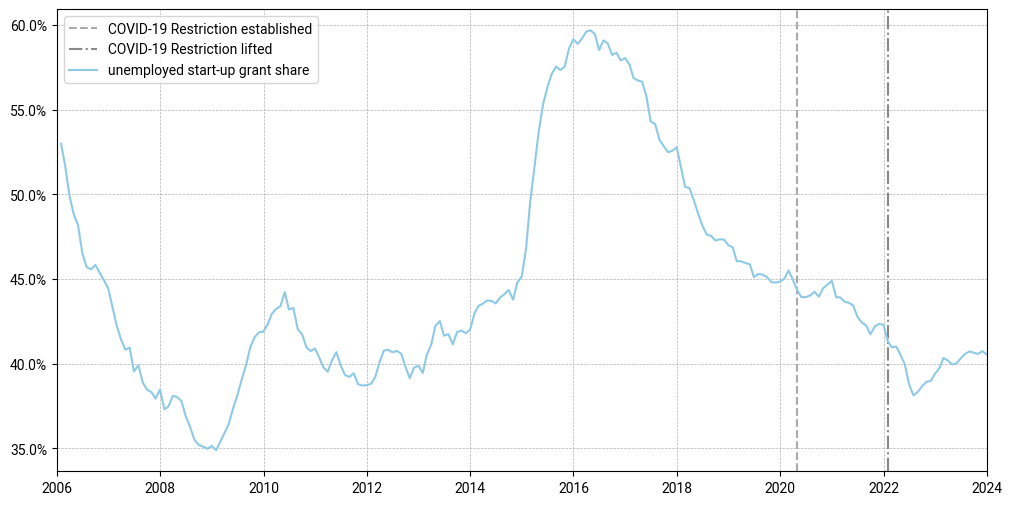

In [36]:
plt.figure(figsize=(12, 6))
plt.grid(True, which="both", ls="--", lw=0.5)

COVID = dt.strptime("2020-05-01", "%Y-%m-%d")
NORMAL = dt.strptime("2022-02-01", "%Y-%m-%d")

ax = plt.gca()


plt.xlim(dt.strptime("2006-01-01", "%Y-%m-%d"), dt.strptime("2024-01-01", "%Y-%m-%d"))

plt.axvline(
    x=COVID,
    color="#AAAAAA",
    linestyle="--",
    label="COVID-19 Restriction established",
    lw=1.5,
)
plt.axvline(
    x=NORMAL,
    color="#888888",
    linestyle="-.",
    label="COVID-19 Restriction lifted",
    lw=1.5,
)
sns.lineplot(
    data=data.loc[:, ["unemployed start-up grant share"]],
    palette=["#8ecae6", "#ffb703", "#555555"],
    dashes=False,
    ax=ax,
)
ax.set_xlabel("")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# removing the unnecessary legend title
legend = ax.legend()

plt.show()

In [10]:
data

Type of employment activity,Start-up grant for non-unemployed,Start-up grant for unemployed,Start-up grant with lms
Month,,,
2006-01-31,1921.0,2165.0,66.0
2006-02-28,1972.0,2114.0,171.0
2006-03-31,2057.0,2052.0,281.0
2006-04-30,2079.0,1984.0,378.0
2006-05-31,2088.0,1941.0,491.0
...,...,...,...
2023-09-30,4193.0,2872.0,0.0
2023-10-31,4174.0,2850.0,0.0
2023-11-30,4122.0,2834.0,0.0
